In [1]:
from ipynb.fs.defs.Preprocessing_Module import read_data, add_topological, add_landcover, select_columns, reshape_dataset, fillna_dataset
from ipynb.fs.defs.Feature_Expansion_Module import feature_expansion
from ipynb.fs.defs.Initializer_Module import initializer
from ipynb.fs.defs.Neural_Network_Module import Dataset, transformations, FeedforwardNeuralNetModel, train_nn
from ipynb.fs.defs.Model_Validation_Module import validation_plots, metrics, eucleidian
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime
import warnings
warnings.filterwarnings('ignore')
np.set_printoptions(suppress=True)

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [2]:
# set the only_env as True if you want to use only environmental features
only_env = True
# set the name of the date column
date_col = 'dt_placement'
# set the model type. Could be 'class_regression' or 'mosquito_regression' or 'classification'
model_type = 'mosquito_regression'
# set the transform argument as True if you want to limit the target variable to 0-9 scale
transform_target = False
#set the data for embeddings e.g. data[['col', 'col2']]
embedded_data = None
#set the transformation actions of the data. Options are 'augmentation', 'normalization', 'log', 'scaling'
transformation_list = ['scaling']

In [3]:
data = read_data('../Datasets/Germany/GER_wuerttemberg_culex_2010_2023.csv')
columns = ['x', 'y', 'dt_placement',
           'culex.spp', 'ndvi', 'ndwi', 'ndmi', 'ndbi',
           'ndvi_mean', 'ndvi_std', 'ndwi_mean', 'ndwi_std', 'ndmi_mean',
           'ndmi_std', 'ndbi_mean', 'ndbi_std', 'lst_day', 'lst_night',
           'acc_rainfall_1week', 'acc_rainfall_2week', 'acc_rainfall_jan',
           'lst_jan_day_mean', 'lst_feb_day_mean', 'lst_mar_day_mean', 'lst_apr_day_mean',
           'lst_jan_night_mean', 'lst_feb_night_mean', 'lst_mar_night_mean', 'lst_apr_night_mean' ]
names = ['x', 'y', 'dt_placement',
         'mosq_now', 'ndvi', 'ndwi', 'ndmi', 'ndbi',
         'ndvi_mean', 'ndvi_std', 'ndwi_mean', 'ndwi_std', 'ndmi_mean',
         'ndmi_std', 'ndbi_mean', 'ndbi_std', 'lst_day', 'lst_night',
         'acc_rainfall_1week', 'acc_rainfall_2week', 'acc_rainfall_jan',
         'lst_jan_day_mean', 'lst_feb_day_mean', 'lst_mar_day_mean', 'lst_apr_day_mean',
         'lst_jan_night_mean', 'lst_feb_night_mean', 'lst_mar_night_mean', 'lst_apr_night_mean']
data = select_columns(data,columns,names)
data = add_topological(data,'../Datasets/Topological Datasets/2x2grid/germany_wuerttemberg_2km_geo.csv')
data = add_landcover(data,'../Datasets/Landcover Datasets/2x2grid/germany_wuerttemberg_2km_lulc.csv')
data = reshape_dataset(data,['x','y','dt_placement'])
data = fillna_dataset(data,{'acc_rainfall_1week':0, 'acc_rainfall_2week':0, 'acc_rainfall_jan':0})

Index(['station_id', 'x', 'y', 'dt_placement', 'week', 'month', 'year',
       'country_code', 'nuts0_code', 'nuts0_name', 'nuts1_code', 'nuts1_name',
       'nuts2_code', 'nuts2_name', 'nuts3_code', 'nuts3_name',
       'lau1_municipality', 'lau2_settlement', 'trap_type', 'culex.spp',
       'region', 'dt_placement_original', 'indices_image_date', 'indices_lat',
       'indices_lon', 'ndvi', 'ndmi', 'ndwi', 'ndbi', 'ndvi_mean', 'ndmi_mean',
       'ndwi_mean', 'ndbi_mean', 'ndvi_std', 'ndmi_std', 'ndwi_std',
       'ndbi_std', 'lst_image_date', 'lst_lat', 'lst_lon', 'lst_day',
       'lst_night', 'monthly_lst_lat', 'monthly_lst_lon', 'lst_jan_day_mean',
       'lst_jan_night_mean', 'lst_feb_day_mean', 'lst_feb_night_mean',
       'lst_mar_day_mean', 'lst_mar_night_mean', 'lst_apr_day_mean',
       'lst_apr_night_mean', 'indices_image_date.1', 'indices_lat.1',
       'indices_lon.1', 'acc_rainfall_jan', 'dt_placement_minus_7',
       'dt_placement_minus_14', 'dt_placement_minus_7_avail

In [4]:
data = feature_expansion(data, env=only_env)

In [5]:
data = initializer(data, model_type, dropna=True)

In [6]:
#Operational Split
test = data[(data['dt_placement']>pd.to_datetime('2021-01-01', format="%Y-%m-%d")) & (data['dt_placement']<pd.to_datetime('2022-01-01', format="%Y-%m-%d"))].reset_index(drop=True)
train = data[(data['dt_placement']<pd.to_datetime('2021-01-01', format="%Y-%m-%d"))].reset_index(drop=True)
data

,x,y,dt_placement,ndvi,ndwi,ndmi,ndbi,ndvi_mean,ndvi_std,ndwi_mean,...,landcover,null_island_distance,vert_distance,days_distance,mo_sin,mo_cos,year,lst,summer_days_month,mosq_now
0,7.582356,48.103378,2010-04-11,0.224361,-0.229432,-0.029537,0.029537,0.215533,0.029459,-0.220352,...,5,5398.654222,5348.851588,101,8.660254e-01,-5.000000e-01,2010,10.72,0,0.0
1,7.582356,48.103378,2010-05-10,0.368907,-0.095082,0.175966,-0.175966,0.371471,0.107977,-0.108668,...,5,5398.654222,5348.851588,130,5.000000e-01,-8.660254e-01,2010,13.93,0,1.0
2,7.582356,48.103378,2010-05-30,0.368907,-0.095082,0.175966,-0.175966,0.371471,0.107977,-0.108668,...,5,5398.654222,5348.851588,150,5.000000e-01,-8.660254e-01,2010,21.54,0,0.0
3,7.582356,48.103378,2010-06-13,0.514007,-0.122161,0.356810,-0.356810,0.514168,0.292558,-0.131527,...,5,5398.654222,5348.851588,164,1.224647e-16,-1.000000e+00,2010,18.71,0,0.0
4,7.582356,48.103378,2010-06-30,0.615445,-0.130096,0.395278,-0.395278,0.604053,0.156944,-0.118131,...,5,5398.654222,5348.851588,181,1.224647e-16,-1.000000e+00,2010,23.67,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6252,8.667700,49.550100,2019-07-17,0.328312,-0.313918,0.009891,-0.009891,0.340818,0.129281,-0.320676,...,8,5571.500987,5509.719735,198,-5.000000e-01,-8.660254e-01,2019,24.14,0,2.0
6253,8.667700,49.550100,2019-07-31,0.294033,-0.274217,-0.016763,0.016763,0.307601,0.119885,-0.284302,...,8,5571.500987,5509.719735,212,-5.000000e-01,-8.660254e-01,2019,27.93,0,4.0
6254,8.667700,49.550100,2019-08-14,0.290536,-0.262010,0.036553,-0.036553,0.391927,0.060189,-0.334085,...,8,5571.500987,5509.719735,226,-8.660254e-01,-5.000000e-01,2019,21.41,0,6.0
6255,8.667700,49.550100,2019-08-30,0.289436,-0.255814,0.003096,-0.003096,0.299689,0.110735,-0.262654,...,8,5571.500987,5509.719735,242,-8.660254e-01,-5.000000e-01,2019,26.39,0,1.0


In [7]:
#define a nn 
model = FeedforwardNeuralNetModel(num_features=len(train.iloc[0,:])-2, num_class=1, encode_layers = [360,256,128,64],
                                  decode_layers = [64,128,256,360], latent_dim=5, dropout=[0.3,0.3,0,0],
                                  model_type=model_type, learning_rate = 0.005, epochs = 100, batch_size = 512,
                                  transformation_list = transformation_list, early_stop = None)

In [8]:
#preprocess nn input
del train[date_col]
date = test[date_col]
del test[date_col]

train_X, train_y, test_X, test_y = transformations(train, test = test, model_type = model.model_type, 
                                                   embedding_data = model.embedding_data,
                                                   transformation_list = model.transformation_list)

training_set = Dataset(train_X, train_y)

testing_set = Dataset(test_X, test_y)

Epoch 001: | Train Loss: 293.05235 | Val Loss: 638323.50000 | Train Acc: 7.408| Val Acc: 283.305
Epoch 002: | Train Loss: 252.55487 | Val Loss: 635732.43750 | Train Acc: 7.305| Val Acc: 282.200
Epoch 003: | Train Loss: 218.02457 | Val Loss: 623461.68750 | Train Acc: 6.895| Val Acc: 275.870
Epoch 004: | Train Loss: 195.51027 | Val Loss: 620857.93750 | Train Acc: 6.527| Val Acc: 276.800
Epoch 005: | Train Loss: 174.26155 | Val Loss: 621535.43750 | Train Acc: 6.173| Val Acc: 276.980
Epoch 006: | Train Loss: 152.86931 | Val Loss: 618894.00000 | Train Acc: 5.962| Val Acc: 275.495
Epoch 007: | Train Loss: 138.84255 | Val Loss: 619376.43750 | Train Acc: 5.791| Val Acc: 274.585
Epoch 008: | Train Loss: 135.43186 | Val Loss: 617267.75000 | Train Acc: 5.689| Val Acc: 275.700
Epoch 009: | Train Loss: 133.31575 | Val Loss: 621821.06250 | Train Acc: 5.734| Val Acc: 275.720
Epoch 010: | Train Loss: 127.22311 | Val Loss: 624487.75000 | Train Acc: 5.556| Val Acc: 277.930
Epoch 011: | Train Loss: 120.8

Epoch 087: | Train Loss: 48.89028 | Val Loss: 629723.18750 | Train Acc: 3.459| Val Acc: 280.815
Epoch 088: | Train Loss: 47.26461 | Val Loss: 634494.18750 | Train Acc: 3.476| Val Acc: 281.875
Epoch 089: | Train Loss: 45.77086 | Val Loss: 631978.06250 | Train Acc: 3.421| Val Acc: 281.125
Epoch 090: | Train Loss: 44.92491 | Val Loss: 630935.75000 | Train Acc: 3.356| Val Acc: 280.980
Epoch 091: | Train Loss: 47.93516 | Val Loss: 629879.50000 | Train Acc: 3.479| Val Acc: 280.630
Epoch 092: | Train Loss: 46.08031 | Val Loss: 631581.43750 | Train Acc: 3.437| Val Acc: 280.790
Epoch 093: | Train Loss: 44.38299 | Val Loss: 631674.06250 | Train Acc: 3.381| Val Acc: 281.500
Epoch 094: | Train Loss: 45.15204 | Val Loss: 632793.06250 | Train Acc: 3.378| Val Acc: 281.685
Epoch 095: | Train Loss: 45.32425 | Val Loss: 632684.87500 | Train Acc: 3.372| Val Acc: 281.535
Epoch 096: | Train Loss: 43.54675 | Val Loss: 631992.93750 | Train Acc: 3.354| Val Acc: 281.220
Epoch 097: | Train Loss: 44.62646 | Val 

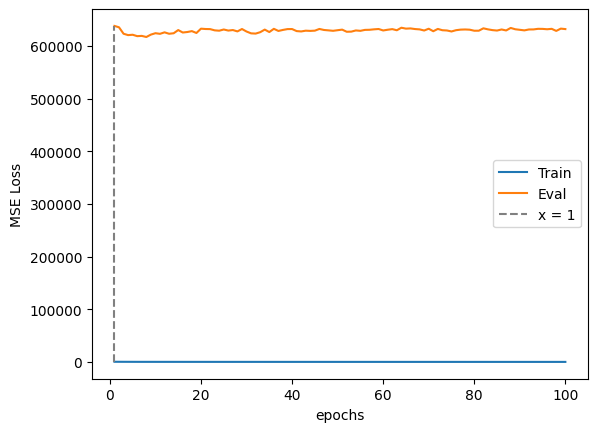

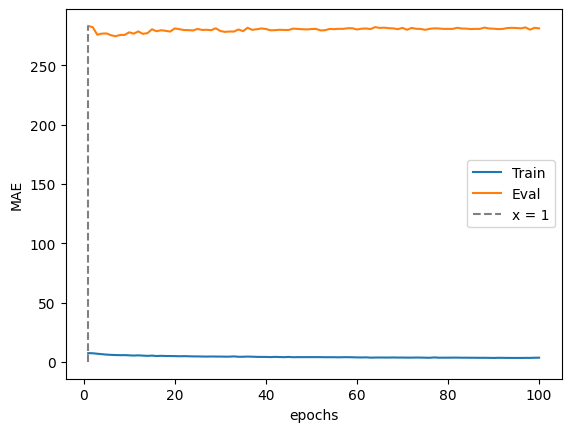

In [9]:
#train_nn
results_train, results_test, latent_train, latent_test, _ = train_nn(model = model, train_set = training_set,
                                                                     test_set = testing_set, features=None, max_val = train_y.max())

MAE on train set:  3.128095975232198
min prediction: 0
max prediction: 61

MAE on test set:  281.355
Error <= 30: 66.00 %
min prediction: 0
max prediction: 61


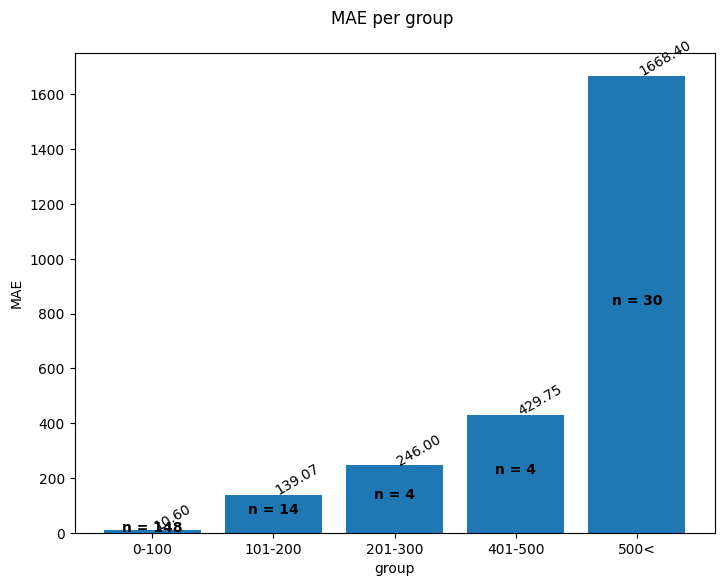

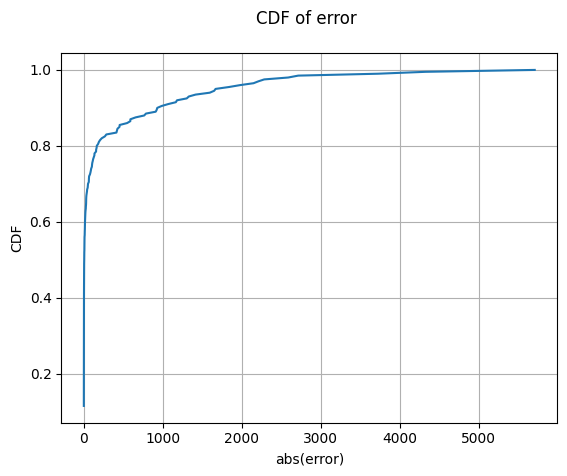

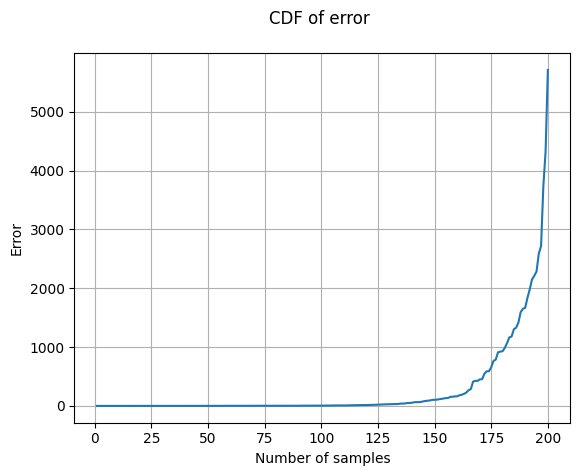

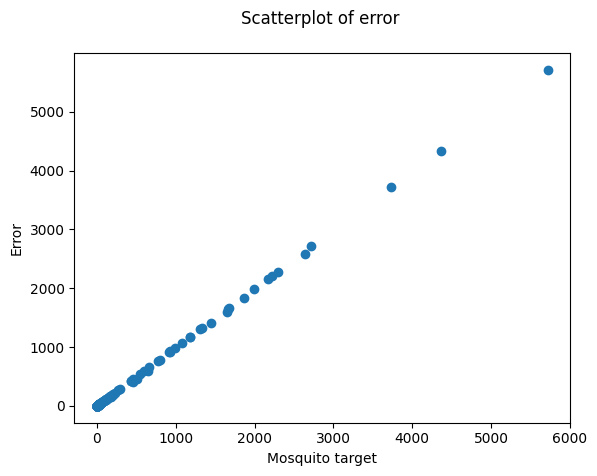

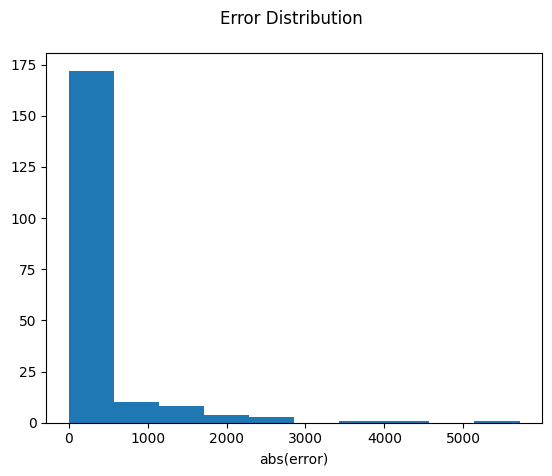

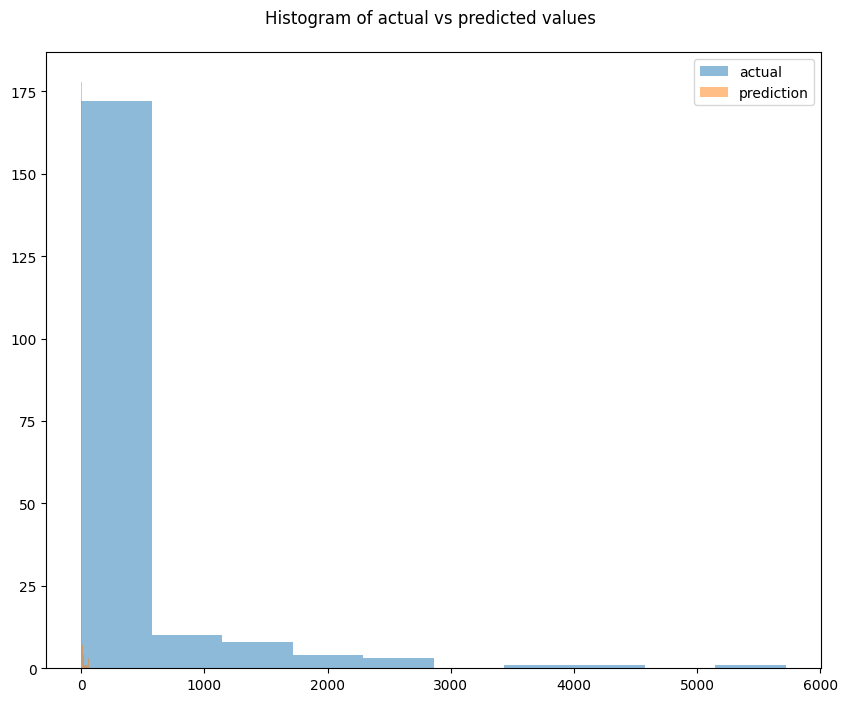

In [10]:
results_test[date_col] = date
results_test['dt_prediction'] = results_test[date_col] + datetime.timedelta(days=15)
results_test['error'] = results_test['actual'] - results_test['prediction']
results_test['abs(error)'] = np.abs(results_test['actual'] - results_test['prediction'])

if model_type == 'mosquito_regression':
    metrics(results_train, results_test, threshold=30)
else:
    metrics(results_train, results_test)
validation_plots(results_test,model_type)

In [11]:
results_train['error'] = results_train['actual'] - results_train['prediction']
results_train['abs(error)'] = np.abs(results_train['actual'] - results_train['prediction'])
results_train = pd.concat([results_train, pd.DataFrame(latent_train)],axis=1)
results_train

,actual,prediction,error,abs(error),0,1,2,3,4
0,0.0,4,-4.0,4.0,0.802443,-0.210030,1.055531,1.099812,0.418566
1,0.0,2,-2.0,2.0,0.314653,-0.104230,1.855443,0.970247,0.526583
2,1.0,4,-3.0,3.0,-0.217255,-0.068243,0.949230,0.611263,-0.586654
3,0.0,1,-1.0,1.0,0.369958,-0.001808,1.511016,0.682615,1.478473
4,69.0,61,8.0,8.0,-0.417546,-0.904983,-0.424521,-0.409613,-1.311174
...,...,...,...,...,...,...,...,...,...
5163,4.0,3,1.0,1.0,0.720584,0.096597,1.479078,0.515950,-0.488841
5164,2.0,2,0.0,0.0,0.891098,-0.015889,1.690147,0.656163,0.824082
5165,1.0,1,0.0,0.0,-0.289386,0.128203,1.546687,0.601994,-0.176139
5166,20.0,32,-12.0,12.0,0.702758,-0.185483,-0.012946,0.566536,-0.616300


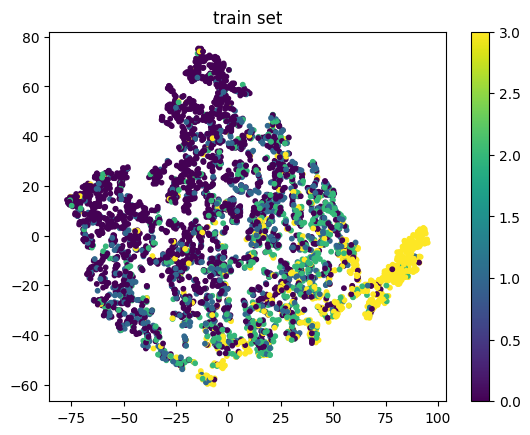

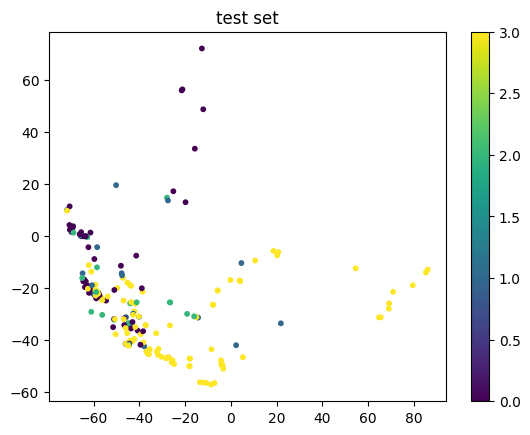

In [12]:
q=5
bins, bounds = pd.qcut(pd.concat([results_train['abs(error)'],results_test['abs(error)']]), retbins=True, q=q, duplicates='drop')

# q=[-1, 5, 10, 20, 50, 100, 200, 300, 400, 500, 600]
# bins, bounds = pd.cut(pd.concat([results_train['abs(error)'],results_test['abs(error)']]), bins=q, retbins=True, labels=classes)

bins = bins.cat.codes
latent = np.concatenate((latent_train, latent_test))
colour_dots = pd.concat([results_train['abs(error)'], results_test['abs(error)']])
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(latent)
X1_tsne = X_tsne[:latent_train.shape[0],:]
X2_tsne = X_tsne[latent_train.shape[0]:,:]

# Visualize the t-SNE result
plt.scatter(X1_tsne[:, 0], X1_tsne[:, 1], c=bins[:latent_train.shape[0]], s=10)
plt.colorbar()
plt.title('train set')
plt.show()

plt.scatter(X2_tsne[:, 0], X2_tsne[:, 1], c=bins[latent_train.shape[0]:], s=10)
plt.colorbar()
plt.title('test set')
plt.show()

In [13]:
#keep only train observations with error less than MAE
results_good = results_train.loc[results_train['abs(error)']<results_train['abs(error)'].mean(), 0:].reset_index(drop=True)
results_good

,0,1,2,3,4
0,0.314653,-0.104230,1.855443,0.970247,0.526583
1,-0.217255,-0.068243,0.949230,0.611263,-0.586654
2,0.369958,-0.001808,1.511016,0.682615,1.478473
3,0.732155,0.082472,1.156415,1.391890,-0.231785
4,0.269294,0.100505,2.185089,0.575828,0.780587
...,...,...,...,...,...
3971,0.062230,-0.001490,1.733628,0.134457,0.753823
3972,0.720584,0.096597,1.479078,0.515950,-0.488841
3973,0.891098,-0.015889,1.690147,0.656163,0.824082
3974,-0.289386,0.128203,1.546687,0.601994,-0.176139


In [14]:
percentage =0.2

In [15]:
euc_M_dist = eucleidian(np.array(results_good), latent_test, 3)
results_test['dist'] = euc_M_dist
results_test_latent = results_test.sort_values(by=['dist','abs(error)']).reset_index(drop=True)
print('correlation:', results_test_latent.corr().loc['abs(error)','dist'])
print("good:", results_test_latent.iloc[:round(len(results_test_latent)*percentage)]['abs(error)'].mean())
print("bad:", results_test_latent.iloc[-round(len(results_test_latent)*percentage):]['abs(error)'].mean())

correlation: 0.5390005553163575
good: 13.775
bad: 955.45


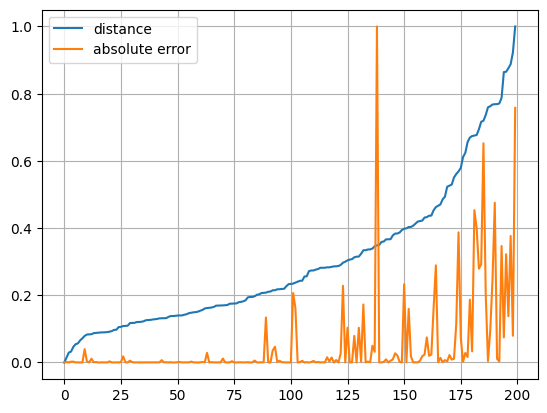

In [16]:
distance = (results_test_latent['dist'] - results_test_latent['dist'].min())/(results_test_latent['dist'].max()-results_test_latent['dist'].min())
error=(results_test_latent['abs(error)']-results_test_latent['abs(error)'].min())/(results_test_latent['abs(error)'].max()-results_test_latent['abs(error)'].min())
plt.plot(distance, label='distance')
plt.plot(error, label='absolute error')
plt.legend()
plt.grid()
plt.show()

In [17]:
results_good = results_train.loc[results_train['abs(error)']<results_train['abs(error)'].mean()].index
results_good = train_X[0][results_good,:]

euc_M_dist = eucleidian(results_good, test_X[0], 3)
results_test['dist'] = euc_M_dist
results_test.corr()
results_test_fs = results_test.sort_values(by=['dist','abs(error)']).reset_index(drop=True)
print('correlation:', results_test_fs.corr().loc['abs(error)','dist'])
print("good:", results_test_fs.iloc[:round(len(results_test_fs)*percentage)][ 'abs(error)'].mean())
print("bad:", results_test_fs.iloc[-round(len(results_test_fs)*percentage):]['abs(error)'].mean())

correlation: 0.10545903266897239
good: 184.15
bad: 358.075


In [18]:
results_good = results_train.loc[results_train['abs(error)']<results_train['abs(error)'].mean()].index
results_good = train.loc[results_good,['x','y']]

euc_M_dist = eucleidian(np.array(results_good.drop_duplicates().reset_index(drop=True)), np.array(test[['x','y']]), 3)
results_test['dist'] = euc_M_dist
results_test.corr()
results_test_coord = results_test.sort_values(by=['dist','abs(error)']).reset_index(drop=True)
print('correlation:', results_test_coord.corr().loc['abs(error)','dist'])
print("good:", results_test_coord.iloc[:round(len(results_test_coord)*percentage)]['abs(error)'].mean())
print("bad:", results_test_coord.iloc[-round(len(results_test_coord)*percentage):]['abs(error)'].mean())

correlation: -0.06086618398678409
good: 158.9
bad: 155.05
